<a href="https://colab.research.google.com/github/kingajutrzenka/ML-Bootcamp-I/blob/main/RL-%C4%87wiczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresja liniowa - ćwiczenie**

## Spis treści
1. [Import bibliotek](#Import-bibliotek)
2. [Generowanie danych](#Generowanie-danych)
3. [Regresja liniowa](#Regresja-liniowa-przy-użyciu-scikit-learn)
4. [Wizualizacja modelu](#Wizualizacja-graficzna-modelu)
5. [R^2](#Współczynnik-R^2)
6. [Podział na dane testowe i treningowe](#Podział-na-dane-testowe-i-treningowe)
7. [Zbiór treningowy wizualizacja](#zbiór-treningowy-wizualizacja)
8. [Zbiór testowy wizualizacja](#zbiór-testowy-wizualizacja)
9. [Predykcja](#Predykcja-na-podstawie-modelu)


# Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True,
                    edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f"{x:.2f}"))
sklearn.__version__

'1.6.1'

# Generowanie danych

In [ ]:
from sklearn.datasets import make_regression # losuje

data, target = make_regression(n_samples=100,
                               n_features=1, n_targets=1,
                               noise=30, random_state=42)
print(data.shape, target.shape)

(100, 1) (100,)


In [ ]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [ ]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

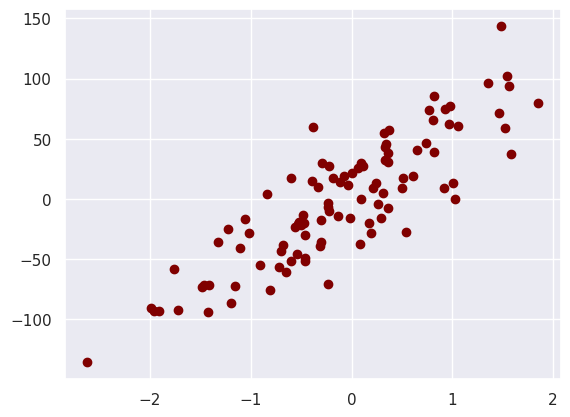

In [ ]:
plt.scatter(data, target, color =  '#800000')

# Regresja liniowa przy użyciu scikit-learn

Y = w0 + w1X1

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)

LinearRegression()

In [ ]:
# ocena R2
regressor.score(data, target)

0.7426670084336404

In [ ]:
# predykcja
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

# Wizualizacja graficzna modelu

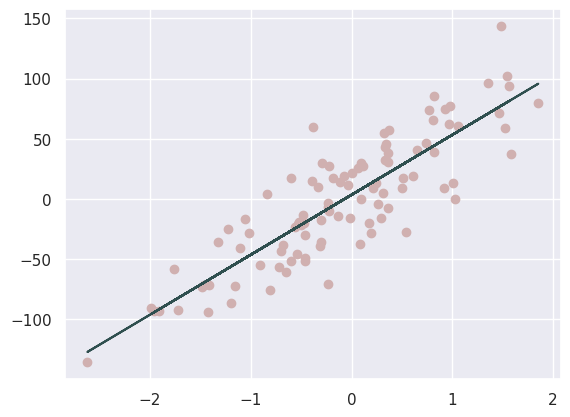

In [ ]:
plt.scatter(data, target, color = '#d0b0b0')
plt.plot(data, y_pred, color = '#2f4f4f')
plt.show()

# Współczynnik R^2

Współczynnik **R^2** to **1 - u/v**, gdzie:

u = ((y_true - y_pred) ** 2).sum()

v = ((y_true - y_true.mean()) ** 2).sum()

In [ ]:
regressor.score(data, target)

-1.6797847780653572

In [ ]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

In [ ]:
regressor.coef_

array([49.83])

In [ ]:
regressor.intercept_

np.float64(3.4953459615809184)

końcowa postać modelu Y = 3.495 + 49.83 * X1

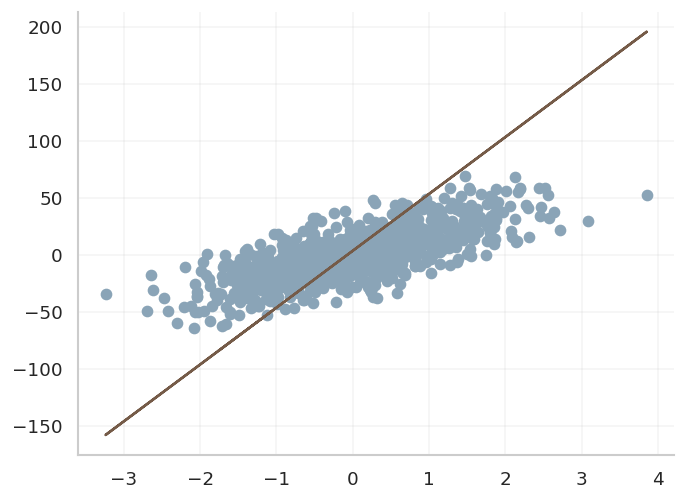

In [ ]:
y_pred = regressor.predict(data)
plt.scatter(data, target, color = '#8aa4b7')
plt.plot(data, y_pred, color = '#755b48')
plt.show()

# Podział na dane testowe i treningowe

In [ ]:
def set_soft_earthy_theme():
    """Jasny styl – soft earthy"""
    palette = ["#6B705C", "#A5A58D", "#CB997E", "#B5838D", "#DDBEA9"]
    sns.set_theme(
        style="whitegrid",
        rc={
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.titlesize": 16,
            "axes.labelsize": 12,
            "grid.alpha": 0.2,
            "figure.dpi": 120,
            "savefig.dpi": 150,
        }
    )
    sns.set_palette(palette)
    return palette


In [ ]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42)

print(data.shape)
print(target.shape)

(1000, 1)
(1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(750, 1) (750,)
(250, 1) (250,)


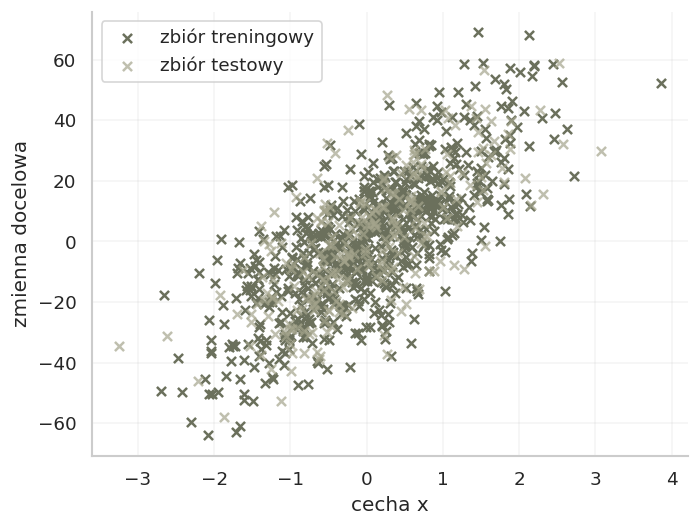

In [ ]:
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, color=palette[0], label= 'zbiór treningowy', s=30, alpha=1, marker='x')
plt.scatter(X_test, y_test, color=palette[1], label= 'zbiór testowy', s=30, alpha=0.7, marker='x')
plt.legend()
plt.show()

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_train, y_train)

0.5550440098049001

In [ ]:
regressor.score(X_test, y_test)
# model zazwyczaj ma gorszy wynik na testowych

0.5108438585354155

# zbiór treningowy wizualizacja

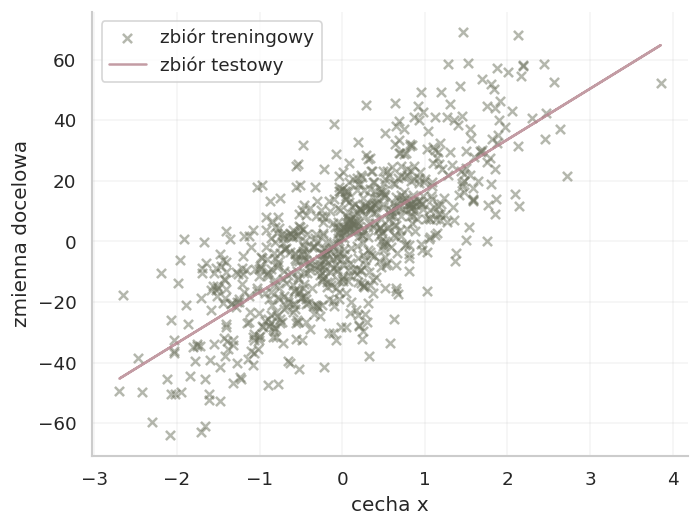

In [ ]:
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, color=palette[0], label= 'zbiór treningowy', s=30, alpha=0.5, marker='x')
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color=palette[3], alpha=0.8, label= 'zbiór testowy')
plt.legend()
plt.show()

# zbiór testowy wizualizacja

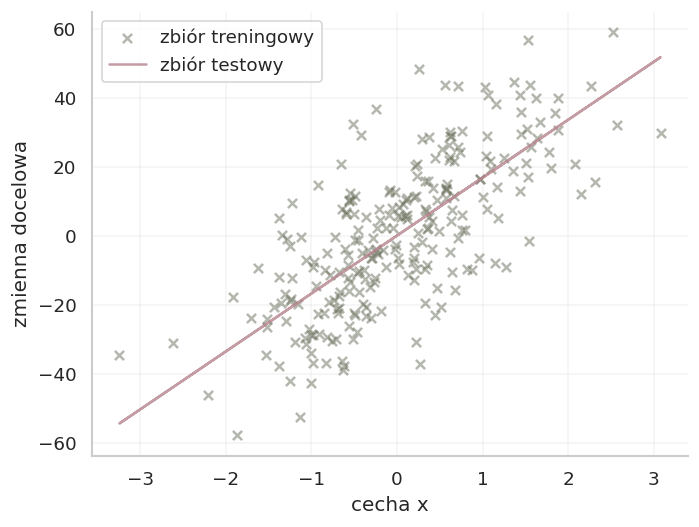

In [ ]:
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, color=palette[0], label= 'zbiór treningowy', s=30, alpha=0.5, marker='x')
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color=palette[3], alpha=0.8, label= 'zbiór testowy')
plt.legend()
plt.show()

# Predykcja na podstawie modelu

In [ ]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


In [ ]:
predictions['errror'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,errror
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


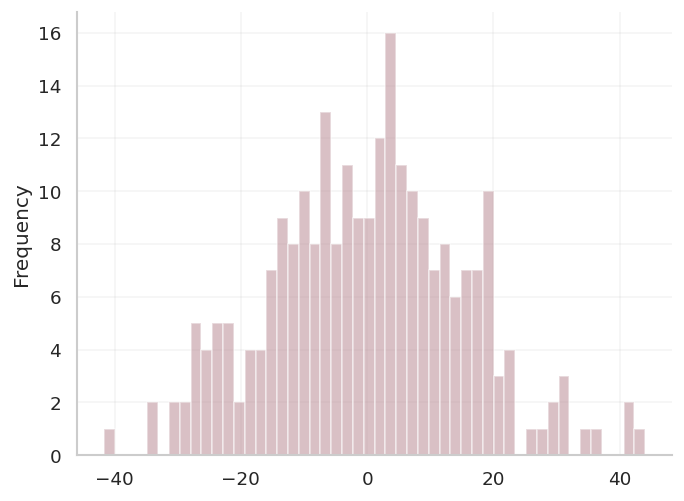

In [ ]:
_ = predictions['errror'].plot(kind='hist', bins=50, color=palette[3], alpha=0.5)